In [14]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [15]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

car = pd.read_csv('C:/Users/admin/Videos/car.csv',index_col=[0], parse_dates=[0], date_parser=parser)
car.head(5)

Sales
Month            
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180

In [16]:
## see here month is taken as string 
## so it is not taken as a date we need to so i will import a package

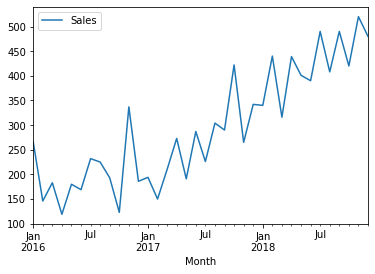

In [19]:
car.plot()
plt.show()

In [21]:
## the graph is not stationary 
## your mean, variance covariance is constant over time for stationarity
## that because my data has trend

In [23]:
## we have to convert this series 
## CONVERTING
car.head()

Sales
Month            
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180

In [26]:
car_diff = car.diff(periods=1)
## integrated of order 1 (lag=1)

In [27]:
car_diff.head(5)

Sales
Month            
2016-01-01    NaN
2016-02-01 -120.0
2016-03-01   37.0
2016-04-01  -64.0
2016-05-01   61.0

In [28]:
## here that NaN is disturbing me a lot
car_diff = car_diff[1:]

In [30]:
car_diff.head(5)

Sales
Month            
2016-02-01 -120.0
2016-03-01   37.0
2016-04-01  -64.0
2016-05-01   61.0
2016-06-01  -11.0

In [31]:
## so far we have seen the graph and said that data is not stationery but we have to verify it also
from statsmodels.graphics.tsaplots import plot_acf

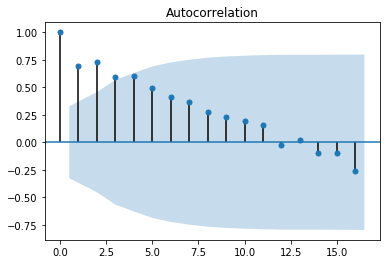

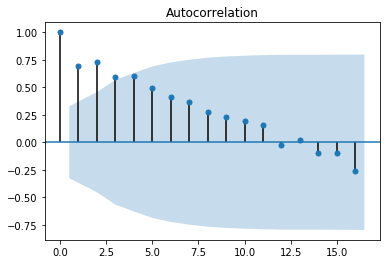

In [32]:
plot_acf(car)

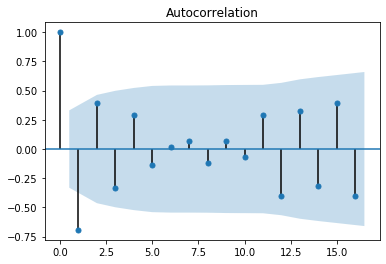

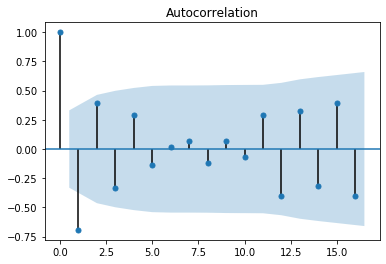

In [33]:
## when it is slowing decaying it shows that series is not stationary so it should ideally decay as soon after the 2nd lag
## we need it 
plot_acf(car_diff)

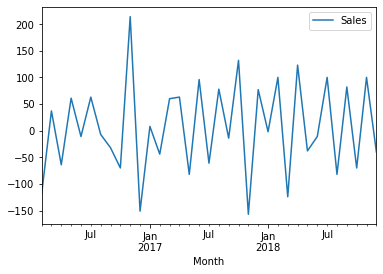

In [36]:
## se here it quickly got down in 2nd lag straight away decayed
car_diff.plot()
plt.show()
## watch the graph now its stationary

In [37]:
x = car.values
x.size

36

In [113]:
train = x[0:27]
test = x[27:]
train.size

27

In [114]:
predictions = []

In [115]:
## this data is good enough for us
## autoregressive model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error


In [116]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()
            

In [117]:
predictions= model_ar_fit.predict(start=26,end=36)
predictions

array([348.46470112, 398.22922886, 368.27242294, 429.47485941,
       379.17750391, 431.35262347, 399.90234723, 433.3589338 ,
       418.74469463, 453.45711544, 429.65174489])

In [118]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

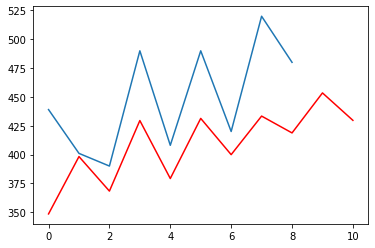

In [119]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [120]:
## see here stationarity has hampered us badly 
## ARIMA model 
from statsmodels.tsa.arima_model import ARIMA

In [121]:
## p = periods taken for autoregressive model 
## it is like if i want to predict my sales for month of july i am taking sales figure of june or may month 
## so if i am taking only may then p=1 if i am taking both may and june then p=2 
## d = integrated order how many times new column with shoft function is done
## q = moving average no. of period 
model_arima = ARIMA(train, order=(4,2,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

291.39913447175024


In [122]:
predictions = model_arima_fit.forecast(steps = 9)[0] ## this 0 because i am only interested in first array
predictions

array([419.8622191 , 399.60378085, 480.05781704, 431.16700923,
       488.8013932 , 488.07665638, 543.45028781, 535.49541695,
       575.01644311])

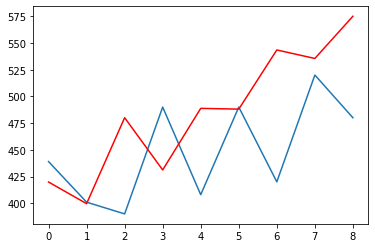

In [123]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [124]:
## to calculate the error between predictions and original value
mean_squared_error(test,predictions)

4775.633962395447

In [110]:
## we font know which p,d,q value is best so we go into a function called aic 
## so you should go for minimum value of aic go above to see it
## so we should do trial and error with these value of (p,d,q)



In [111]:
## therefore to see all combinations of these values of p,d,q
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q)) 
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [104]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
   


(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.40758681554314
(4, 0, 0) 311.0706562039329
(4, 0, 1) 321.8309391983909
(4, 1, 0) 295.93436313519135
(4, 1, 1) 297.9098817

In [ ]:
## see the minimum aic value coming is 291 (4,2,1)